# 120 vuotta olympia kilpailijoita (1896-2016)

## Alkukäsittely

Rivejä on 270 000 ja 15 saraketta, joista päätimme tarkestella vain mitalisteja.  
Koska halusimme tarkastella vain mitalisteja poistimme kaikki jotka eivät ole voittaneet mitään.  
Poistimme noin 231 000 riviä mitalli sarakkeesta, jolloin jäljelle jäi vain mitalisteja on vain 39783.  
Koska yksi henkilö voi voittaa monta mitalia monena vuonna ja jopa samoissa kisoissa, siksi emme poistaneet duplikaatteja.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("athlete_events.csv")

data.head()

data = data.dropna(subset = ['Medal'])
missing_count = data.isnull().sum()
print(missing_count)

missing_count = data.isnull().sum()

total_data = np.prod(data.shape)
total_missing = missing_count.sum()
per_of_missing_data = (total_missing / total_data) * 100
print("null: ", per_of_missing_data, "%")

ID           0
Name         0
Sex          0
Age        732
Height    8711
Weight    9327
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
dtype: int64
null:  3.1453971126695657 %


### poikkeamat

nuorin ja vanhin mitalisti ovat 10 ja 73.  
Vanhin kilpailija oli 97 vuotias veistäjä. Hän oli kuollut 20 vuotta ennen kilpailuja.

In [43]:
vanhin = np.max(data['Age'])
nuorin = np.min(data['Age'])
print("vanhin ", vanhin, "nuorin ", nuorin)

vanha = data.loc[(data['Age'] == 73)]
nuori = data.loc[(data['Age'] == 10)]
vanhus = data.loc[(data['Age'] == 97)]
print(vanha)
print(nuori)
print(vanhus)

vanhin  73.0 nuorin  10.0
          ID                                           Name Sex   Age  Height  \
44584  22984  John (Herbert Crawford-) Copley (Williamson-)   M  73.0     NaN   

       Weight           Team  NOC        Games  Year  Season    City  \
44584     NaN  Great Britain  GBR  1948 Summer  1948  Summer  London   

                  Sport                                          Event  \
44584  Art Competitions  Art Competitions Mixed Painting, Graphic Arts   

        Medal AgeGroup  
44584  Silver      41+  
           ID                Name Sex   Age  Height  Weight  \
142882  71691  Dimitrios Loundras   M  10.0     NaN     NaN   

                                 Team  NOC        Games  Year  Season    City  \
142882  Ethnikos Gymnastikos Syllogos  GRE  1896 Summer  1896  Summer  Athina   

             Sport                                  Event   Medal AgeGroup  
142882  Gymnastics  Gymnastics Men's Parallel Bars, Teams  Bronze      NaN  
Empty DataFrame
Columns

## Data objects and Atributes and statistics


In [27]:
df = pd.read_csv('athlete_events.csv')


nominal_columns = [col for col in df.columns if df[col].dtype == 'object']
print("Nominal Attributes:", nominal_columns)

ordinal_columns = ['Age'] 
print("Ordinal Attributes:", ordinal_columns)


for col in df.select_dtypes(include=np.number).columns:
    data = df[col].dropna()
    print(f"Statistics for {col}:")
    print(f"Keskiarvo: {np.mean(data):.2f}")
    print(f"Mediaani: {np.median(data):.2f}")
    print(f"Keskihajonta: {np.std(data):.2f}")
    print(f"Min: {np.min(data):.2f}, Max: {np.max(data):.2f}")
    print("-" * 30)

Nominal Attributes: ['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event', 'Medal']
Ordinal Attributes: ['Age']
Statistics for ID:
Keskiarvo: 68248.95
Mediaani: 68205.00
Keskihajonta: 39022.21
Min: 1.00, Max: 135571.00
------------------------------
Statistics for Age:
Keskiarvo: 25.56
Mediaani: 24.00
Keskihajonta: 6.39
Min: 10.00, Max: 97.00
------------------------------
Statistics for Height:
Keskiarvo: 175.34
Mediaani: 175.00
Keskihajonta: 10.52
Min: 127.00, Max: 226.00
------------------------------
Statistics for Weight:
Keskiarvo: 70.70
Mediaani: 70.00
Keskihajonta: 14.35
Min: 25.00, Max: 214.00
------------------------------
Statistics for Year:
Keskiarvo: 1978.38
Mediaani: 1988.00
Keskihajonta: 29.88
Min: 1896.00, Max: 2016.00
------------------------------


## kaaviot

### ikä jakauma


In [32]:
bins = [13,20,25,30,35,40,100]
labels = ['13-20', '21-25', '26-30', '31-35', '36-40', '41+']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)

age_group_counts = data['AgeGroup'].value_counts().sort_index()
print(age_group_counts)

AgeGroup
13-20     5388
21-25    15651
26-30    11489
31-35     4178
36-40     1296
41+       1025
Name: count, dtype: int64


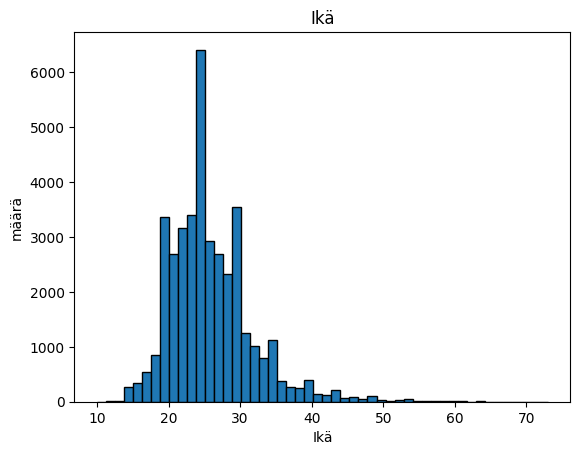

In [36]:

column_data = data["Age"]
plt.hist(column_data, bins = 50, edgecolor = "black")

plt.xlabel('Ikä')
plt.ylabel('määrä')
plt.title('Ikä')

plt.show()

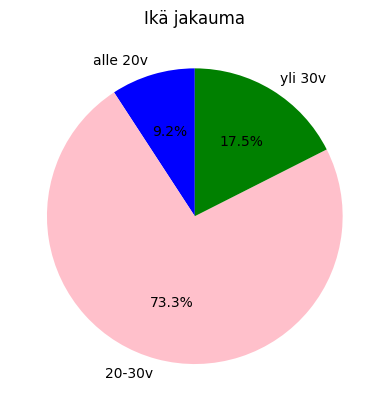

In [5]:
column_data = data['Age']


nuoret = data[data['Age'] < 20].shape[0]
aikuiset = data[(data['Age'] > 20) & (data['Age'] <=30 )].shape[0]
vanhat = data[data['Age'] > 30 ].shape[0]
colors = ['blue', 'pink', 'green']

arvot = [nuoret, aikuiset, vanhat]
labels = ['alle 20v', '20-30v', 'yli 30v']

plt.pie(arvot, labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 90)

plt.title('Ikäjakauma')
plt.show()

### sukupuolijakauma

naiset saivat osallistua olympialaisiin vasta 1900. Noin 1000:sta osallistujasta vain 22 oli naisia ja he saivat osallistua vain muutamiin lajeihin.  



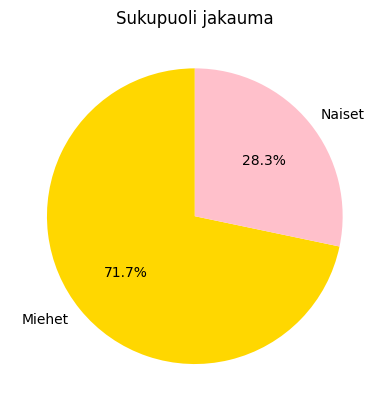

In [37]:
column_data = data["Sex"]

miehet =  data[data['Sex'] == 'M'].shape[0]
naiset =  data[data['Sex'] == 'F'].shape[0]
colors = ['gold', 'pink']

arvot = [miehet, naiset]
Labels = ["Miehet", "Naiset"]

plt.pie(arvot, labels = Labels, colors = colors, autopct = '%1.1f%%', startangle = 90)

plt.title("Sukupuolijakauma")

plt.show()

### Top 10 Mitalimaat

Yhdysvallat on voittanut selvästi enemmän kuin mikään muu maa.  
Suomi jää sijalle 17

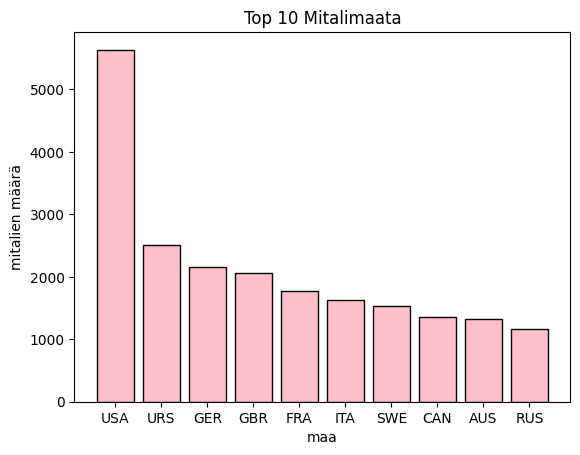

NOC
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
ITA    1637
SWE    1536
CAN    1352
AUS    1320
RUS    1165
Name: count, dtype: int64


In [38]:
mitali_maat = data["NOC"].value_counts().head(10)

maat = mitali_maat.index
maara = mitali_maat.values

plt.bar(maat, maara, color = 'pink', edgecolor = 'black')

plt.xlabel('maa')
plt.ylabel('mitalien määrä')
plt.title('Top 10 Mitalimaata')

plt.show()
print(mitali_maat)

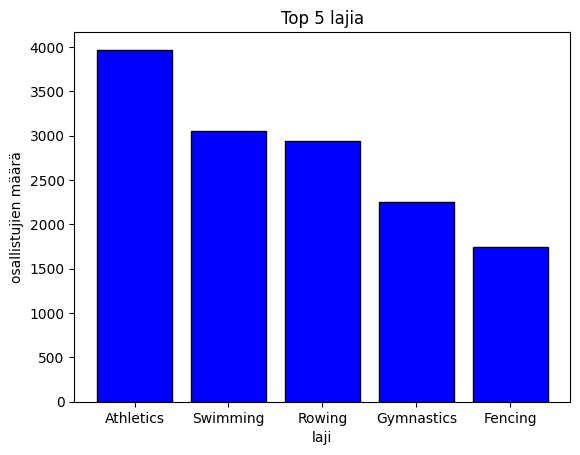

In [24]:
mitali_maat = data["Sport"].value_counts().head(5)

maat = mitali_maat.index
maara = mitali_maat.values

plt.bar(maat, maara, color = 'blue', edgecolor = 'black')

plt.xlabel('laji')
plt.ylabel('osallistujien määrä')
plt.title('Top 5 lajia')

plt.show()

## Suomi


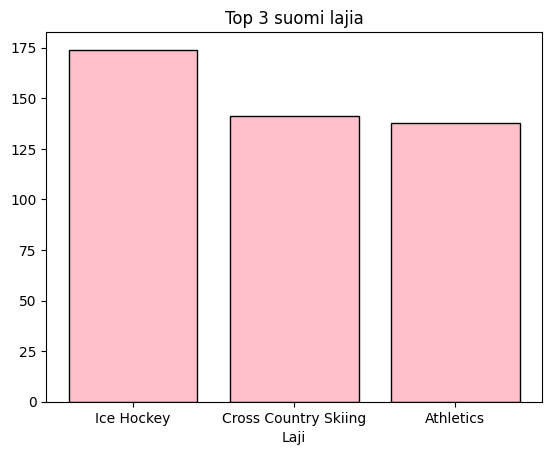

In [8]:
suomi_lajit = data[data['NOC'] == 'FIN']['Sport'].value_counts().head(3)

maat = suomi_lajit.index
maara = suomi_lajit.values

plt.bar(maat, maara, color='pink', edgecolor='black')

plt.xlabel('Laji')
plt.ylabel('')
plt.title('Top 3 suomi lajia')

plt.show()

C:\Users\Mico\AppData\Local\Temp\ipykernel_8388\2358791080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aikuiset = fin_data[(fin_data['Age'] > 20) & (data['Age'] <=30 )].shape[0]


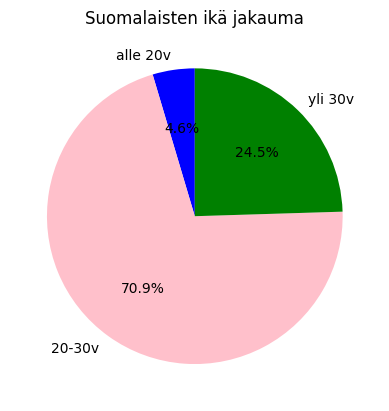

In [4]:
fin_data = data[data['NOC'] == 'FIN']

nuoret = fin_data[fin_data['Age'] < 20].shape[0]
aikuiset = fin_data[(fin_data['Age'] > 20) & (data['Age'] <=30 )].shape[0]
vanhat = fin_data[fin_data['Age'] > 30 ].shape[0]
colors = ['blue', 'pink', 'green']

arvot = [nuoret, aikuiset, vanhat]
labels = ['alle 20v', '20-30v', 'yli 30v']

plt.pie(arvot, labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 90)

plt.title('Suomalaisten ikäjakauma')
plt.show()


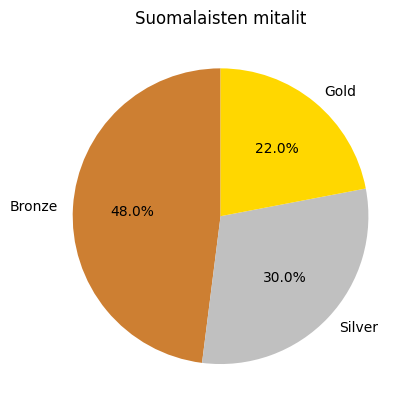

In [13]:
fin_medal = data[data['NOC'] == 'FIN']
medal_counts = fin_data['Medal'].value_counts()

colors = ['#cd7f32', 'silver', 'gold']  # Värit kultamitalille, hopealle ja pronssille
labels = medal_counts.index.tolist()   # Mitalityypit
arvot = medal_counts.values.tolist()

plt.pie(arvot, labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 90)

plt.title('Suomalaisten mitalit')
plt.show()

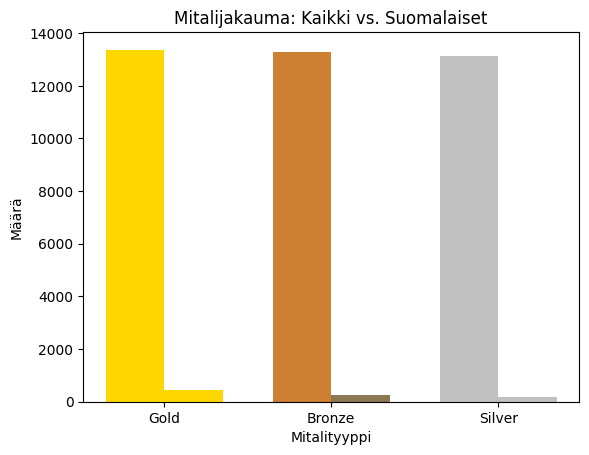

In [16]:
all_medal_counts = data['Medal'].value_counts()
fin_data = data[data['NOC'] == 'FIN']
fin_medal_counts = fin_data['Medal'].value_counts()

categories = all_medal_counts.index
x = np.arange(len(categories)) 

all_counts = all_medal_counts.values
fin_counts = fin_medal_counts.values

bar_width = 0.35
plt.bar(x - bar_width / 2, all_counts, width=bar_width, label='Kaikki', color=['gold', '#cd7f32', 'silver'])
plt.bar(x + bar_width / 2, fin_counts, width=bar_width, label='Suomalaiset', color=['#FFD700', '#8C7853', 'silver'])

plt.xlabel('Mitalityyppi')
plt.ylabel('Määrä')
plt.title('Mitalijakauma: Kaikki vs. Suomalaiset')
plt.xticks(x, categories)

plt.show()


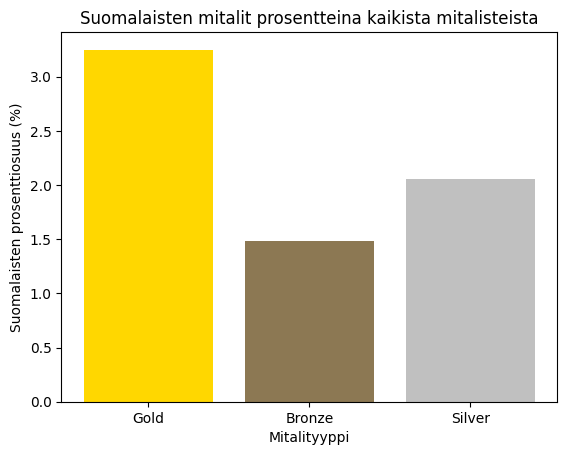

In [18]:
all_medal_counts = data['Medal'].value_counts()

fin_data = data[data['NOC'] == 'FIN']
fin_medal_counts = fin_data['Medal'].value_counts()

fin_medal_percent = (fin_medal_counts / all_medal_counts) * 100

categories = all_medal_counts.index
x = np.arange(len(categories))

plt.bar(x, fin_medal_percent, color=['gold', '#8C7853', 'silver'])

plt.xlabel('Mitalityyppi')
plt.ylabel('Suomalaisten prosenttiosuus (%)')
plt.title('Suomalaisten mitalit prosentteina kaikista mitalisteista')
plt.xticks(x, categories)

plt.show()

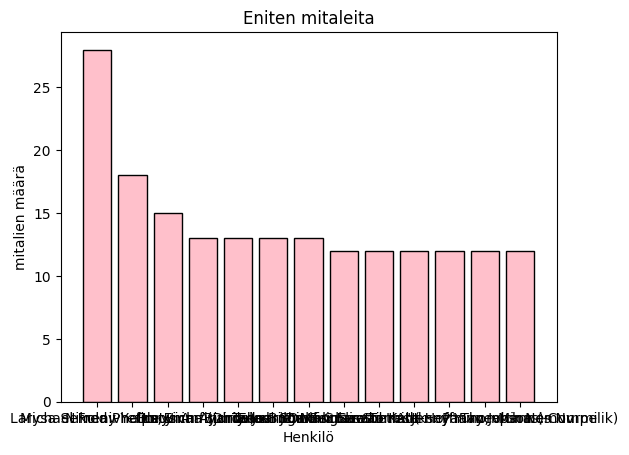

Name
Michael Fred Phelps, II                            28
Larysa Semenivna Latynina (Diriy-)                 18
Nikolay Yefimovich Andrianov                       15
Ole Einar Bjrndalen                                13
Borys Anfiyanovych Shakhlin                        13
Takashi Ono                                        13
Edoardo Mangiarotti                                13
Birgit Fischer-Schmidt                             12
Sawao Kato                                         12
Dara Grace Torres (-Hoffman, -Minas)               12
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)    12
Aleksey Yuryevich Nemov                            12
Paavo Johannes Nurmi                               12
Name: count, dtype: int64


In [46]:
mitali_maat = data["Name"].value_counts().head(13)

maat = mitali_maat.index
maara = mitali_maat.values

plt.bar(maat, maara, color = 'pink', edgecolor = 'black')

plt.xlabel('Henkilö')
plt.ylabel('mitalien määrä')
plt.title('Eniten mitaleita')

plt.show()
print(mitali_maat)